# 02_analyse_data

In [1]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

file_list = ['velocity_0_um_per_s.hdf5',
             'velocity_500_um_per_s.hdf5',
             'velocity_1000_um_per_s.hdf5',
             'velocity_3000_um_per_s.hdf5',
             'velocity_5000_um_per_s.hdf5',
             'velocity_10000_um_per_s.hdf5']

path = os.getcwd()
basepath = os.path.dirname(path)
datapath = basepath+'/data'
figpath = basepath+'/figures'
srcpath =  basepath +'/src'
filename = 'analysis_flow'

## Open the hdf5 files and get the temperature fields, heat sources and check the velocities

In [2]:
T_list = []
Q_list = []
v_list = []
for file in file_list:
    f = h5py.File(datapath + '/' + file)
    #print(list(f.keys()))
    attrs = f.attrs
    dx,dy = attrs['dx'],attrs['dy']
    nx,ny = attrs['nx'],attrs['ny']
    #print(attrs.keys())
    #print(attrs['dx'])
    T_list.append(f['T'][...])
    Q_list.append(f['Q_in'][...])
    v_list.append(attrs['v_max'])
    f.close()

## Plot the cross-sections as a function of velocity

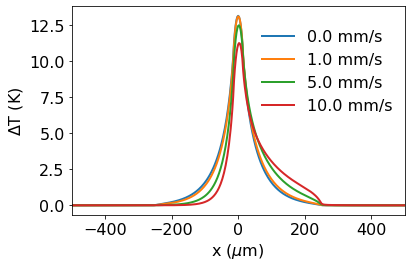

In [3]:
x = np.linspace(-(nx-1)/2*dx*1000000,(nx-1)/2*dx*1000000,nx)

fig,ax=plt.subplots(1,1,figsize=[6,4])

for i,T in enumerate(T_list):
    if i in [0,2,4,5]:
        myplot = ax.plot(x,T[:,49],linewidth=2,label = str(1000*v_list[i])+' mm/s')
ax.set_xlabel('x ($\mu$m)')
ax.set_ylabel('$\Delta$T (K)')
ax.set_xlim(x.min(),x.max())
fig.legend(frameon = False,loc=[0.62,0.55])
fig.tight_layout()

fig.savefig(figpath+'/'+filename+'_1d.png',dpi=150)

## Look at the difference between temperature at 200 $\mu$m and at 200 $\mu$m as a function of velocity

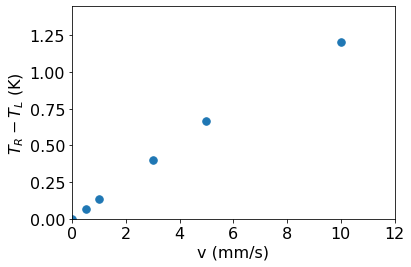

In [4]:
diff_therm = []
for i,T in enumerate(T_list):
    diff_therm.append(-T[120,49]+T[280,49])

fig,ax=plt.subplots(1,1,figsize=[6,4])
ax.plot(1000*np.array(v_list),diff_therm,'.',markersize=15)
ax.set_xlabel('v (mm/s)')
ax.set_ylabel('$T_R-T_L$ (K)')
ax.set_xlim(0,1000*max(v_list)*1.2)
ax.set_ylim(0,max(diff_therm)*1.2)
fig.tight_layout()

fig.savefig(figpath+'/'+filename+'_diff.png',dpi=150)

# Look at the thermal resistance as a function of velocity

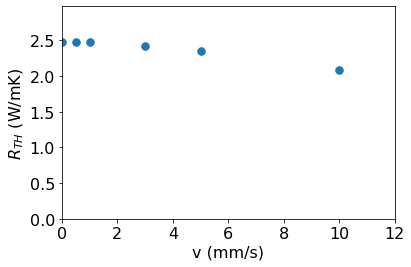

In [5]:
thermal_resistance = []
for i,T in enumerate(T_list):
    thermal_resistance.append(np.average(T[195:206,49])/(1e3*10*5e-4))

fig,ax=plt.subplots(1,1,figsize=[6,4])
ax.plot(1000*np.array(v_list),thermal_resistance,'.',markersize=15)
ax.set_xlabel('v (mm/s)')
ax.set_ylabel('$R_{TH}$ (W/mK)')
ax.set_xlim(0,1000*max(v_list)*1.2)
ax.set_ylim(0,max(thermal_resistance)*1.2)
fig.tight_layout()

fig.savefig(figpath+'/'+filename+'_Rth.png',dpi=150)